<a href="https://colab.research.google.com/github/stefanoridolfi/Corso_ML/blob/master/funzione%20retta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1)Generatore di retta

In [0]:
def GenRetta(x):
  y=0.5*x+10
  return y



#2)Genera i punti x ed y e stampa la retta
Il codice genera 500 valori di x, nell'intervallo da -250 a 250 e calcola i relativi y. Inserisce i valori di x e di y in due diverse liste, lx ed ly. Il calcolo dei valori y è eseguito utilizzando la funzione GenRetta precedente.


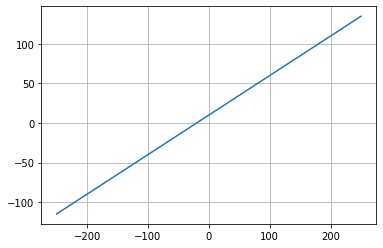

In [0]:
import matplotlib.pyplot as pl
lx=[]
ly=[]
for x in range(-250,251):
  y=GenRetta(x)
  lx.append(x)
  ly.append(y)
pl.plot(lx,ly)
pl.grid(True)
pl.show()

#3)Genera n punti random con valori compresi fra -250 e 250
La funzione genera n punti con coordinate x ed y che hanno valori casuali compresi fra -250 e 250. La funzione ritorna la lista l che è formata da n liste, ognuna delle quali contiene due elementi, i valori della coppia x ed y che sono le coordinate dei punti.


In [0]:
import random
def generaPunti(n):
  l=[]
  for i in range(0,n):
    x=random.random()*500-251
    y=random.random()*500-251
    l.append([x,y])
  return l


#4)Disegno la retta, genero punti, coloro i punti a seconda della posizione
Con la funzione definita prima disegno la retta di riferimento. Con la funzione di generazione dei punti creo n punti in modo casuale. A seconda del valore della y del punto decido se il punto è posizionato sopra oppure sotto la retta.
Se il punto è sopra la retta lo coloro di verde, se il punto è sotto la retta lo coloro di rosso 

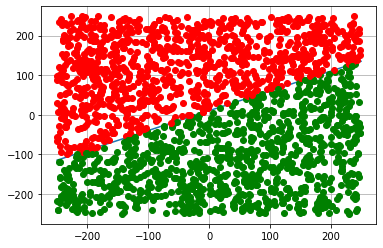

In [0]:
# Disegno la retta
import matplotlib.pyplot as pl
lx=[]
ly=[]
for x in range(-250,251):
  y=GenRetta(x)
  lx.append(x)
  ly.append(y)
pl.plot(lx,ly)
pl.grid(True)
#pl.show()
# Genero i punti: creo una lista di coppie di coordinate. Ogni coppia è una lista

listaPunti=generaPunti(2000)
# Analizzo il valore della y di ogni punto e lo coloro
for punto in listaPunti:
  x=punto[0]
  y=punto[1]
  if y<GenRetta(x):
    etichetta="go"
  else:
    etichetta="ro"
  pl.plot(x,y,etichetta)
    

#5)Definisco una funzione che genera casualmente i pesi.
La funzione genera i valori dei pesi che dovranno essere associati agli input del perceptron. I pesi hanno valori compresi fra -1 ed 1.I La funzioni ha come input il numero di input del perceptron, n è il parametro della funzione. La funzione restituisce una lista di pesi, con dimensione pari al numero di input.

In [0]:
def pesi(num_input):
  import random
  pesi=[]
  for x in range(0,num_input+1):
      valore_peso=random.random()*2-1
      pesi.append(valore_peso)
  return pesi



5.1)Test della funzione pesi

In [0]:
lista_pesi=pesi(2)
print("Dimensioni della lista=  ", len(lista))
print("valori della lista:  ",lista)

Dimensioni della lista=   3
valori della lista:   [-0.7133171452578404, 0.5348885128617229, -0.8639924548131379]


#6)Definisco una funzione che effettua la previsione dell'output. 
La funzione ha come input una singola lista contenuta nella lista  delle coordinate dei punti generati casualmente. Ovvero l'input è una singola coordinata (coppia di valori). La funzione, per ogni singolo punto, moltiplica il valore del peso corrispondente per il valore della coordinata, x ed y, presente nella lista composta da 2 elementi. Inoltre visto che il numero dei pesi generati, ovvero la dimensione della lista pesi è il numero di pesi passato come input alla funzioni pesi, più 1, moltiplico il primo peso per la costante di BIAS(pari ad 1 o -1). Ad esempio nel nostro caso il numero di parametri è 2, la x e la y, quindi num_input sulla funzione pesi sarà 2, ma il numero di pesi generati è 3, perchè range andrà da 0 a 2, e quindi assumerà i valori 0,1 e 2.
Per controllare questo comportamento esguire il test di pesi al punto 5.1 del foglio. La funzione restituisce il valore 1 oppure -1 a seconda del valore della sommatoria di :sum=BIAS\*pesi[0]+x\*pesi[1]+y\*pesi[2].La funzione ha come input la lista delle coordinate del punto generico che è generato in modo casuale al punto 3) del foglio. La variabile di input della funzione, inputs, è una lista di un numero di elementi pari al numero degli input del perceptron.

In [0]:
def feed_forward(inputs):
  for k in range(1,len(lista_pesi)):
    sum=sum+lista_pesi[k]*inputs[k]
  # il primo elemento della lista_pesi è il peso del BIAS per questo k va da 1, secondo elemento della lista_pesi
  sum=sum+BIAS*lista_pesi[0]
  if sum >0:
    return 1
  return -1



#7) Definisco la funzione posizione
La funzione ha come input le coordinate del punto e mi restituisce il valore 1 o -1 a seconda che il punto sia sopra oppure sotto la retta di riferimento

In [0]:
def posizione(inputs):
  if inputs[1]>GenRetta(inputs[0]):
    answer=1
  else:
    answer=0
  return(answer)

# 8)Definisco la funzione back propagation
La funzione back propagation ha come parametri di input la lista che contiene le coordinate del punto. La funzione calcola anche il valore corretto per quel punto, la sua posizione usando la funzione posizione. L'output desiderato è il valore 1 o -1 a seconda di dove si trova il punto rispetto alla retta iniziale secondo la quale devo effettuare la classificazione dei punti. Come output la funzione restituisce    restituisce i valori dei pesi, ovvero la lista dei pesi e se la previsione era esatta oppure no. Restitisce il valore 0 se non era un'errore , 1 altrimenti. Ovvero il vaoore 0 se il valore fornito dalla funzione guess coincide o no con il valore reale

In [0]:
def back_propagation(inputs):
  speed=0.13
  guess=feed_forward(inputs) # assumerà il valore 1 o -1 a seconda se il punto è sopra o sotto secondo le previsioni
  desired=posizione(inputs)
  error=desired-guess 
  # errore può essere 0 oppure 2, oppre -2
  # Ora devo aggiornare la lista dei pesi a seconda che l'errore sia 0 o no
  for x in range(len(pesi)):
    pesi[x]=pesi[x]+error*speed
  if error==0:
    presenza_errore=0
  else:
    presenza_errore=1
  return(pesi)



#XXX) Programma fino a questo punto
a) Disegno la retta (punto 1 del foglio)  , ovvero la retta di equazione y=0.5*x+10: che è la retta 0.5x-y+10 =0

b) Creo lista punti con coordinate casuali (punto 3 del foglio)

c) Creo la lista dei pesi (punto 5 del foglio)

d) Per ogni punto generato casualmente calcolo la funzione feed_forward (punto 6 del foglio)

e) Disegno il punto generato casualmente e lo coloro. Se la funzione feed_forward mi restituisce il valore 1 assumo che il punto casuale sia sopra la retta ipotetica di separazione e lo coloro di verde. Se mi restituisce il valore -1 assumo che il punto casuale sia sotto la retta ipotetica di separazione e lo coloro di rosso.





lista pesi=    [0.22971781545586412, -0.012629862522222979, 0.7310814187668617] 



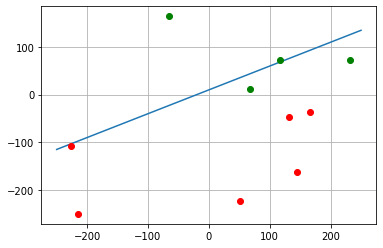

TypeError: ignored

In [27]:
# Funzione che crea lista punti casuali
import random
def generaPunti(n):
  l=[]
  for i in range(0,n):
    x=random.random()*500-251
    y=random.random()*500-251
    l.append([x,y])
  return l
#Funzione che calcola i valori di y della retta di equazione  y=0.5*x+10
def GenRetta(x):
  y=0.5*x+10
  return y


# Disegno la retta
import matplotlib.pyplot as pl
lx=[]
ly=[]
for x in range(-250,251):
  y=GenRetta(x)
  lx.append(x)
  ly.append(y)
pl.plot(lx,ly)
#pl.grid(True)
#pl.show()

# Funzione lista pesi
def pesi(num_input):
  import random
  pesi=[]
  for x in range(0,num_input+1):
      valore_peso=random.random()*2-1
      pesi.append(valore_peso)
  return pesi

# Funzione feed_forward
def feed_forward(inputs):
  BIAS=1
  sum=0
  for k in range(1,len(lista_pesi)):
    sum=sum+lista_pesi[k]*inputs[k-1]
  # il primo elemento della lista_pesi è il peso del BIAS per questo k va da 1, secondo elemento della lista_pesi
  sum=sum+BIAS*lista_pesi[0]
  #print("sum =", sum)
  if sum >0:
    return 1
  return -1

  # Funzione posizione reale del punti rispetto alla retta di riferimento
  def posizione(inputs):
    if inputs[1]>GenRetta(inputs[0]):
      answer=1
    else:
      answer=0
  return(answer)
# Funzione back propagation
  def back_propagation(inputs,pesi_now):
    speed=0.13
    desired=posizione(inputs) # posizione reale del punto sopra (1) o sotto(-1) la retta di riferimento
    guess=feed_forward(inputs) # assumerà il valore 1 o -1 a seconda se il punto è sopra o sotto secondo le previsto
    print("reale= ",desired)
    print("stiamto= ",guess)
    error=desired-guess # errore può essere 0 oppure 2, oppre -2
    print ("Errore= ", error)
  # Ora devo aggiornare la lista dei pesi a seconda che l'errore sia 0 o no
    for x in range(len(pesi_now)):
      pesi_now[x]=pesi_now[x]+ pesi_now[x]*error*speed
    if error==0:
      presenza_errore=0
    else:
      presenza_errore=1
    return(pesi_now)
#############################################################


#Genero lista dei  punti casuali
lista_punti=generaPunti(10)
#print("lista punti generati=  ", lista_punti, "\n")
#Genero lista pesi
lista_pesi=pesi(2)
print("lista pesi=   ", lista_pesi, "\n")
#Ad ogni punto della lista dei punti casuali applico la funzione feed_forward
#print("test feed=  ",feed_forward([10,10]))
for punto in lista_punti:
# guess assumerà il valore 1 o -1 a seconda di dove si trova il punto calcolando la posizione utilizzando i valori dei pesi correnti
 guess=feed_forward(punto)
 #print("punto", punto)
 #print("guess del punto", guess, "\n")
 xp=punto[0]
 yp=punto[1]
 if guess ==1:
   formato='go'
 else:
    formato='ro'
 # stampo il punto
 pl.plot(xp,yp, formato)
pl.grid(True)
pl.show()

# Cerco i valori ottimali dei pesi  punto in lista_punti:
pesi_curr=lista_pesi
for punto in lista_punti:
  new_pesi=back_propagation(punto,pesi_curr)
  print("new pesi= ",new_pesi)
  

